In [1]:
library(data.table)

library(Seurat)
library(dplyr)
library(magrittr)

library(SingleCellExperiment)

library(xlsx)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:



In [2]:
regulons<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")

In [3]:
KO_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)
KO_gene<-as.character(KO_gene[,1])
test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/regulons_indirect.rds")
sum<-numeric()
for(i in 1:length(test)){
    sum<-c(sum,test[[i]])
}
sum<-unique(sum)
TF<-names(regulons)
sum<-unique(c(sum,TF))


In [4]:
length(KO_gene)
length(TF)
length(sum)

[1] 824

[1] 10

[1] 462

In [5]:
sum<-toupper(sum)
KO_gene<-toupper(KO_gene)
Esr1_gene<-toupper(test$Esr1)

In [6]:
TF_gene<-sum[!sum %in% Esr1_gene]
other_gene<-KO_gene[!KO_gene %in% sum]

In [7]:
length(Esr1_gene)
length(TF_gene)
length(other_gene)

[1] 123

[1] 339

[1] 362

In [8]:
Neuron_BP<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/GO_Biological_Process_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_MF<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/GO_Molecular_Function_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_CC<-read.table(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/TF/female/GO_Cellular_Component_2018_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
Neuron_BP<-Neuron_BP[order(Neuron_BP$Adjusted.P.value),]
Neuron_MF<-Neuron_MF[order(Neuron_MF$Adjusted.P.value),]
Neuron_CC<-Neuron_CC[order(Neuron_CC$Adjusted.P.value),]
Neuron_BP<-subset(Neuron_BP,Adjusted.P.value<0.2)
Neuron_MF<-subset(Neuron_MF,Adjusted.P.value<0.2)
Neuron_CC<-subset(Neuron_CC,Adjusted.P.value<0.2)
Neuron_BP$Term<-gsub('.{12}$','',as.character(Neuron_BP$Term))
Neuron_MF$Term<-gsub('.{12}$','',as.character(Neuron_MF$Term))
Neuron_CC$Term<-gsub('.{12}$','',as.character(Neuron_CC$Term))

In [9]:
fraction<-numeric()
for (i in 1:dim(Neuron_CC)[1]){
temp<-eval(parse(text=(as.character(Neuron_CC$Overlap[i])))) *100
fraction<-c(fraction,temp)
}
Neuron_CC$fraction<-fraction
neuron_CC_s<-Neuron_CC
neuron_CC_s$Term<-factor(neuron_CC_s$Term,levels=as.character(rev(neuron_CC_s$Term)))

In [10]:
CC_term<-c("gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","synapse","gene_expression","gene_expression",
           "synapse","synapse")

In [11]:
color<-numeric()
for(i in 1:length(CC_term)){
    if(CC_term[i]=="gene_expression"){color[i]<-"darkgreen"}
    else if(CC_term[i]=="synapse"){color[i]<-"darkblue"}
    else if(CC_term[i]=="energy"){color[i]<-"salmon"}
    else if(CC_term[i]=="morphology"){color[i]<-"yellow3"}
}

In [12]:
# separating fractions into Esr1, TF and others

In [13]:
#Esr1
neuron_CC_Esr1<-neuron_CC_s
neuron_CC_Esr1$type<-"Esr1"
fraction_p<-numeric()
for(i in 1:dim(neuron_CC_Esr1)[1]){
    fraction_p[i]<-neuron_CC_Esr1$fraction[i]*sum(strsplit(as.character(neuron_CC_Esr1[i,"Genes"]),split=";")[[1]] %in% Esr1_gene)/length(strsplit(as.character(neuron_CC_Esr1[i,"Genes"]),split=";")[[1]])
}
neuron_CC_Esr1$fraction_p<-fraction_p

In [14]:
neuron_CC_Esr1

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,fraction,type,fraction_p
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<dbl>
1,cytosolic ribosome,45/124,9.340860e-31,4.166024e-28,0,0,8.808331,609.058542,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPS27L;RPL8;RPL9;RPL7;RPS15;RPS4X;RPL7A;RPS17;RPS16;RPS15A;RACK1;RPS3;RPLP2;RPS2;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;EIF2A;RPL19;MCTS1;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;RPS25;RPL27A;RPS20;RPL22L1;RPL26;RPS21;RPS24;RPS23,36.290323,Esr1,1.6129032
2,cytosolic part,48/159,1.533726e-28,3.420210e-26,0,0,7.327349,469.277760,RPL4;RPL5;RPL30;RPL31;RPLP1;RPL12;RPS27L;RPL8;RPL9;RPL7;RPS15;RPS4X;RPL7A;RPS17;RPS16;RPS15A;RACK1;RPS3;RPLP2;RPS2;CCT8;RPS11;RPS27A;RPL39;RPS10;RPL17;RPS13;EIF2A;RPL19;CCT4;MCTS1;RPL21;RPS7;RPS8;RPL23;RPL22;RPL35A;RPSA;RPL23A;RPS25;RPL27A;TCP1;RPS20;RPL22L1;RPL26;RPS21;RPS24;RPS23,30.188679,Esr1,1.2578616
3,cytosolic small ribosomal subunit,23/49,2.171952e-19,3.228968e-17,0,0,11.392907,489.592969,MCTS1;RPS7;RPS8;RPS27L;RPSA;RPS15;RPS4X;RPS25;RPS17;RPS16;RPS15A;RACK1;RPS3;RPS20;RPS2;RPS11;RPS27A;RPS10;RPS21;RPS13;RPS24;EIF2A;RPS23,46.938776,Esr1,4.0816327
4,small ribosomal subunit,23/53,1.984474e-18,2.212688e-16,0,0,10.533065,429.340123,MCTS1;RPS7;RPS8;RPS27L;RPSA;RPS4X;RPS15;RPS25;RPS17;RPS16;RPS15A;RACK1;RPS3;RPS20;RPS2;RPS11;RPS27A;RPS10;RPS21;RPS13;RPS24;EIF2A;RPS23,43.396226,Esr1,3.7735849
6,cytosolic large ribosomal subunit,22/69,2.404127e-14,1.787068e-12,0,0,7.738849,242.682601,RPL4;RPL5;RPL30;RPL21;RPL31;RPLP1;RPL23;RPL12;RPL22;RPL35A;RPL23A;RPL8;RPL9;RPL7;RPL7A;RPL27A;RPLP2;RPL22L1;RPL26;RPL39;RPL17;RPL19,31.884058,Esr1,0.0000000
5,ribosome,23/76,2.208306e-14,1.969809e-12,0,0,7.345427,230.969342,RPL30;RPS7;RPL31;DHX9;RPL23;RPL12;LARP4B;RPL8;RPL9;RPS4X;RPL7A;RPS25;RPS17;NEMF;RPS3;RPL26;RPS11;RPL39;RPS10;RPS21;RPS13;RPL19;RPS23,30.263158,Esr1,1.3157895
7,large ribosomal subunit,22/72,6.506111e-14,4.145322e-12,0,0,7.416397,225.187394,RPL4;RPL5;RPL30;RPL21;RPL31;RPLP1;RPL23;RPL12;RPL22;RPL35A;RPL23A;RPL8;RPL9;RPL7;RPL7A;RPL27A;RPLP2;RPL22L1;RPL26;RPL39;RPL17;RPL19,30.555556,Esr1,0.0000000
8,focal adhesion,43/356,2.741617e-10,1.528451e-08,0,0,2.931712,64.548382,RPL4;RPL5;NRP1;RPL30;RPL31;RPLP1;RPL12;GDI2;FHL1;RPL8;RPL9;LPP;SYNE2;RPL7;HSP90B1;RPS15;RPS4X;RPL7A;RPS17;RPS16;FLRT2;CHORDC1;RPS3;RPLP2;RPS2;RPS11;RPS10;RPS13;RPL19;PDIA3;NPM1;MAP2K1;RPS7;HSPA5;RPS8;RPL23;RPL22;ARPC5;ENAH;EHD3;ARPC3;CTNNB1;CDH13,12.078652,Esr1,1.9662921
9,polysome,15/63,2.835342e-08,1.405069e-06,0,0,5.779011,100.430642,RPL30;RPL31;VBP1;DHX9;LARP4B;RPL8;RPS4X;RPL7A;PSMA6;RPS3;RPL39;MYH10;RPS21;RPL19;RPS23,23.809524,Esr1,0.0000000


In [15]:
# TF except for Esr1
neuron_CC_TF<-neuron_CC_s
neuron_CC_TF$type<-"TF_gene"

fraction_p<-numeric()
for(i in 1:dim(neuron_CC_TF)[1]){
    fraction_p[i]<-neuron_CC_TF$fraction[i]*sum(strsplit(as.character(neuron_CC_TF[i,"Genes"]),split=";")[[1]] %in% TF_gene)/length(strsplit(as.character(neuron_CC_TF[i,"Genes"]),split=";")[[1]])
}
neuron_CC_TF$fraction_p<-fraction_p

In [16]:
#non Esr1-regulon DEGs
neuron_CC_other<-neuron_CC_s
neuron_CC_other$type<-"other_gene"

fraction_p<-numeric()
for(i in 1:dim(neuron_CC_other)[1]){
    fraction_p[i]<-neuron_CC_other$fraction[i]*sum(strsplit(as.character(neuron_CC_other[i,"Genes"]),split=";")[[1]] %in% other_gene)/length(strsplit(as.character(neuron_CC_other[i,"Genes"]),split=";")[[1]])
}
neuron_CC_other$fraction_p<-fraction_p

In [17]:
neuron_CC_all<-rbind(neuron_CC_Esr1,neuron_CC_TF)
neuron_CC_all<-rbind(neuron_CC_all,neuron_CC_other)
neuron_CC_all$type<-factor(neuron_CC_all$type,levels=c("Esr1","TF_gene","other_gene"))

In [24]:
subset(neuron_CC_all,Term==neuron_CC_all[4,]$Term)

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,fraction,type,fraction_p
,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
4,small ribosomal subunit,23/53,1.984474e-18,2.212688e-16,0,0,10.53306,429.3401,MCTS1;RPS7;RPS8;RPS27L;RPSA;RPS4X;RPS15;RPS25;RPS17;RPS16;RPS15A;RACK1;RPS3;RPS20;RPS2;RPS11;RPS27A;RPS10;RPS21;RPS13;RPS24;EIF2A;RPS23,43.39623,Esr1,3.773585
41,small ribosomal subunit,23/53,1.984474e-18,2.212688e-16,0,0,10.53306,429.3401,MCTS1;RPS7;RPS8;RPS27L;RPSA;RPS4X;RPS15;RPS25;RPS17;RPS16;RPS15A;RACK1;RPS3;RPS20;RPS2;RPS11;RPS27A;RPS10;RPS21;RPS13;RPS24;EIF2A;RPS23,43.39623,TF_gene,7.547170
42,small ribosomal subunit,23/53,1.984474e-18,2.212688e-16,0,0,10.53306,429.3401,MCTS1;RPS7;RPS8;RPS27L;RPSA;RPS4X;RPS15;RPS25;RPS17;RPS16;RPS15A;RACK1;RPS3;RPS20;RPS2;RPS11;RPS27A;RPS10;RPS21;RPS13;RPS24;EIF2A;RPS23,43.39623,other_gene,32.075472


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


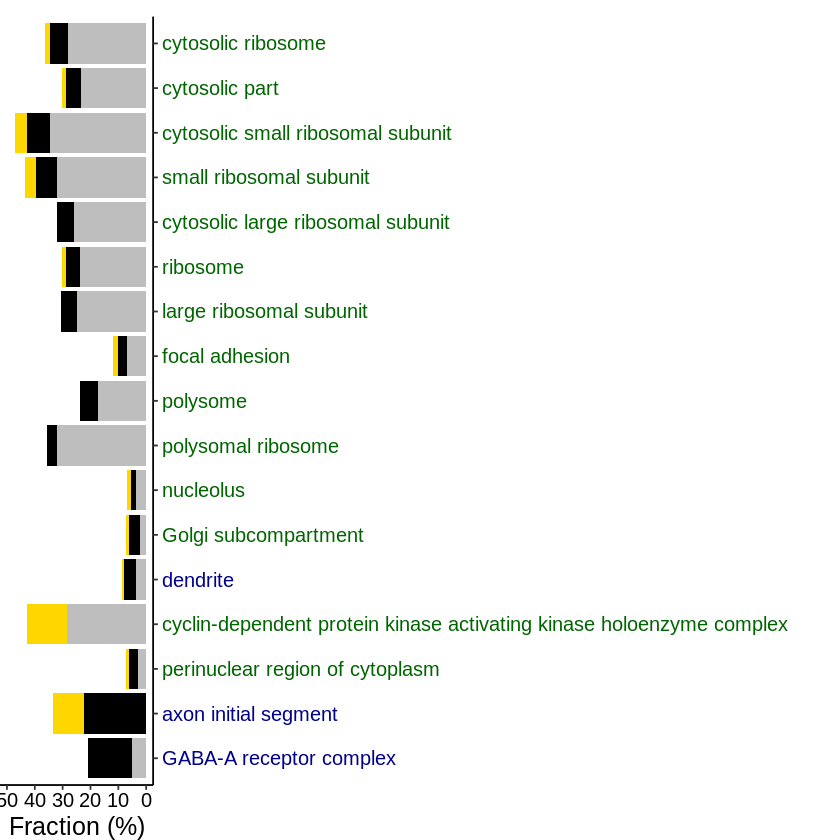

In [126]:
BP<- ggplot(neuron_CC_all, aes(x=Term, y=fraction_p,group=type,fill=type))+geom_bar(stat="identity")+scale_fill_manual(values=c("Esr1"="gold","TF_gene"="black","other_gene"="grey"))+
coord_flip()+ scale_y_reverse(limits=c(50, 0))+scale_x_discrete(position = "top") 
BP+theme(axis.title.y=element_blank(),
        ,axis.text.y=element_text(size=12,colour=rev(color)),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.position = "none",
panel.background = element_blank(),axis.text.x=element_text(size=12,angle = 0, hjust = 0.5,color="black"),axis.title.x=element_text(size=15), axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.1, "cm"),  axis.ticks.y = element_line(size=0.5) , plot.margin = margin(10, 28, 0, 0))+ylab("Fraction (%)")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/ontologyCC_detailed.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Female_ontologyCC_detailed_rev#1_com#10.pdf",height=4, width=10 , paper = "letter")

In [86]:
#MF

In [127]:
fraction<-numeric()
for (i in 1:dim(Neuron_MF)[1]){
temp<-eval(parse(text=(as.character(Neuron_MF$Overlap[i])))) *100
fraction<-c(fraction,temp)
}
Neuron_MF$fraction<-fraction

neuron_MF_s<-Neuron_MF
neuron_MF_s$Term<-factor(neuron_MF_s$Term,levels=as.character(rev(neuron_MF_s$Term)))
MF_term<-c("gene_expression","gene_expression","morphology","gene_expression","gene_expression")

In [128]:
color<-numeric()
for(i in 1:length(MF_term)){
    if(MF_term[i]=="gene_expression"){color[i]<-"darkgreen"}
    else if(MF_term[i]=="synapse"){color[i]<-"darkblue"}
    else if(MF_term[i]=="energy"){color[i]<-"salmon"}
    else if(MF_term[i]=="morphology"){color[i]<-"yellow3"}
}

In [129]:
#Esr1
neuron_CC_Esr1<-neuron_MF_s
neuron_CC_Esr1$type<-"Esr1"
fraction_p<-numeric()
for(i in 1:dim(neuron_CC_Esr1)[1]){
    fraction_p[i]<-neuron_CC_Esr1$fraction[i]*sum(strsplit(as.character(neuron_CC_Esr1[i,"Genes"]),split=";")[[1]] %in% Esr1_gene)/length(strsplit(as.character(neuron_CC_Esr1[i,"Genes"]),split=";")[[1]])
}
neuron_CC_Esr1$fraction_p<-fraction_p

In [130]:
# TF except for Esr1
neuron_CC_TF<-neuron_MF_s
neuron_CC_TF$type<-"TF_gene"

fraction_p<-numeric()
for(i in 1:dim(neuron_CC_TF)[1]){
    fraction_p[i]<-neuron_CC_TF$fraction[i]*sum(strsplit(as.character(neuron_CC_TF[i,"Genes"]),split=";")[[1]] %in% TF_gene)/length(strsplit(as.character(neuron_CC_TF[i,"Genes"]),split=";")[[1]])
}
neuron_CC_TF$fraction_p<-fraction_p

In [131]:
#non Esr1-regulon DEGs
neuron_CC_other<-neuron_MF_s
neuron_CC_other$type<-"other_gene"

fraction_p<-numeric()
for(i in 1:dim(neuron_CC_other)[1]){
    fraction_p[i]<-neuron_CC_other$fraction[i]*sum(strsplit(as.character(neuron_CC_other[i,"Genes"]),split=";")[[1]] %in% other_gene)/length(strsplit(as.character(neuron_CC_other[i,"Genes"]),split=";")[[1]])
}
neuron_CC_other$fraction_p<-fraction_p

In [132]:
neuron_CC_all<-rbind(neuron_CC_Esr1,neuron_CC_TF)
neuron_CC_all<-rbind(neuron_CC_all,neuron_CC_other)
neuron_CC_all$type<-factor(neuron_CC_all$type,levels=c("Esr1","TF_gene","other_gene"))

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


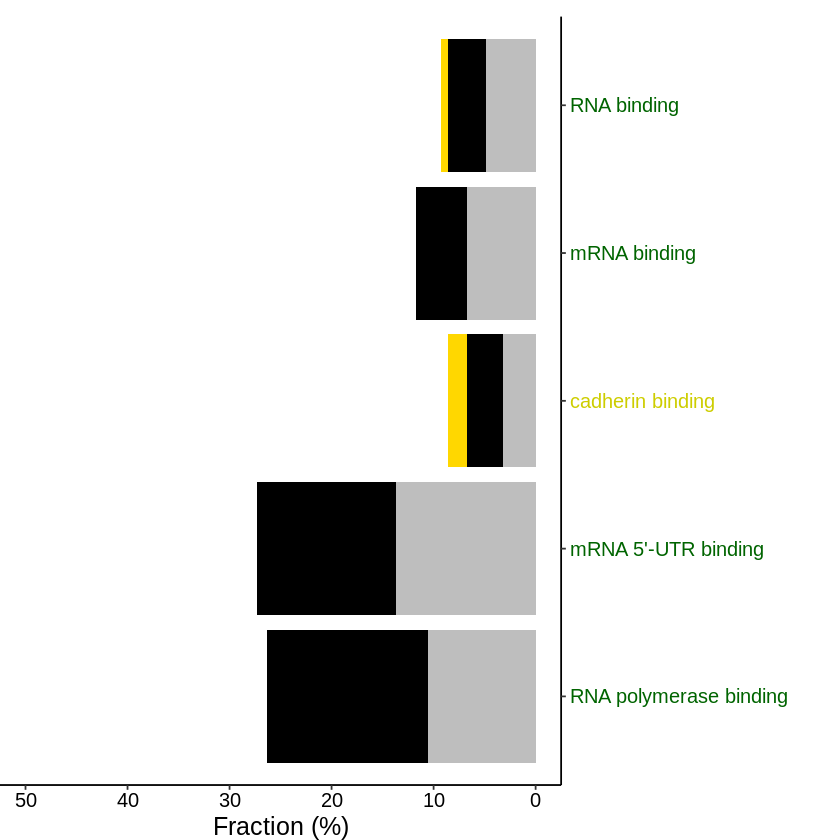

In [133]:
BP<- ggplot(neuron_CC_all, aes(x=Term, y=fraction_p,group=type,fill=type))+geom_bar(stat="identity")+scale_fill_manual(values=c("Esr1"="gold","TF_gene"="black","other_gene"="grey"))+
coord_flip()+ scale_y_reverse(limits=c(50, 0))+scale_x_discrete(position = "top") 
BP+theme(axis.title.y=element_blank(),
        ,axis.text.y=element_text(size=12,colour=rev(color)),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.position = "none",
panel.background = element_blank(),axis.text.x=element_text(size=12,angle = 0, hjust = 0.5,color="black"),axis.title.x=element_text(size=15), axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.1, "cm"),  axis.ticks.y = element_line(size=0.5) , plot.margin = margin(10, 28, 0, 0))+ylab("Fraction (%)")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/ontologyMF_detailed.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Female_ontologyMF_detailed_rev#1_com#10.pdf",height=4, width=10 , paper = "letter")

In [134]:
#BP

In [135]:
fraction<-numeric()
for (i in 1:dim(Neuron_BP)[1]){
temp<-eval(parse(text=(as.character(Neuron_BP$Overlap[i])))) *100
fraction<-c(fraction,temp)
}
Neuron_BP$fraction<-fraction

neuron_BP_s<-Neuron_BP[1:25,]
neuron_BP_s$Term<-factor(neuron_BP_s$Term,levels=as.character(rev(neuron_BP_s$Term)))

In [136]:
BP_term<-c("gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",  
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "gene_expression","morphology","morphology","gene_expression","morphology", 
           "gene_expression","gene_expression","morphology","gene_expression","gene_expression", 
           "morphology","gene_expression","gene_expression","gene_expression","gene_expression", 
           "morphology","gene_expression","gene_expression","gene_expression","gene_expression",
           "gene_expression","gene_expression","morphology","gene_expression","morthology", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression",
            "gene_expression","gene_expression","morphology","gene_expression","morphology", 
           "gene_expression","gene_expression","gene_expression","gene_expression","gene_expression", 
           "synapse","gene_expression","gene_expression","morphology","energy")

In [137]:
BP_term<-BP_term[1:25]

In [138]:
color<-numeric()
for(i in 1:length(BP_term)){
    if(BP_term[i]=="gene_expression"){color[i]<-"darkgreen"}
    else if(BP_term[i]=="synapse"){color[i]<-"darkblue"}
    else if(BP_term[i]=="energy"){color[i]<-"salmon"}
    else if(BP_term[i]=="morphology"){color[i]<-"yellow3"}
}

In [139]:
#Esr1
neuron_CC_Esr1<-neuron_BP_s
neuron_CC_Esr1$type<-"Esr1"
fraction_p<-numeric()
for(i in 1:dim(neuron_CC_Esr1)[1]){
    fraction_p[i]<-neuron_CC_Esr1$fraction[i]*sum(strsplit(as.character(neuron_CC_Esr1[i,"Genes"]),split=";")[[1]] %in% Esr1_gene)/length(strsplit(as.character(neuron_CC_Esr1[i,"Genes"]),split=";")[[1]])
}
neuron_CC_Esr1$fraction_p<-fraction_p

In [140]:
# TF except for Esr1
neuron_CC_TF<-neuron_BP_s
neuron_CC_TF$type<-"TF_gene"

fraction_p<-numeric()
for(i in 1:dim(neuron_CC_TF)[1]){
    fraction_p[i]<-neuron_CC_TF$fraction[i]*sum(strsplit(as.character(neuron_CC_TF[i,"Genes"]),split=";")[[1]] %in% TF_gene)/length(strsplit(as.character(neuron_CC_TF[i,"Genes"]),split=";")[[1]])
}
neuron_CC_TF$fraction_p<-fraction_p

In [141]:
#non Esr1-regulon DEGs
neuron_CC_other<-neuron_BP_s
neuron_CC_other$type<-"other_gene"

fraction_p<-numeric()
for(i in 1:dim(neuron_CC_other)[1]){
    fraction_p[i]<-neuron_CC_other$fraction[i]*sum(strsplit(as.character(neuron_CC_other[i,"Genes"]),split=";")[[1]] %in% other_gene)/length(strsplit(as.character(neuron_CC_other[i,"Genes"]),split=";")[[1]])
}
neuron_CC_other$fraction_p<-fraction_p

In [142]:
neuron_CC_all<-rbind(neuron_CC_Esr1,neuron_CC_TF)
neuron_CC_all<-rbind(neuron_CC_all,neuron_CC_other)
neuron_CC_all$type<-factor(neuron_CC_all$type,levels=c("Esr1","TF_gene","other_gene"))

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


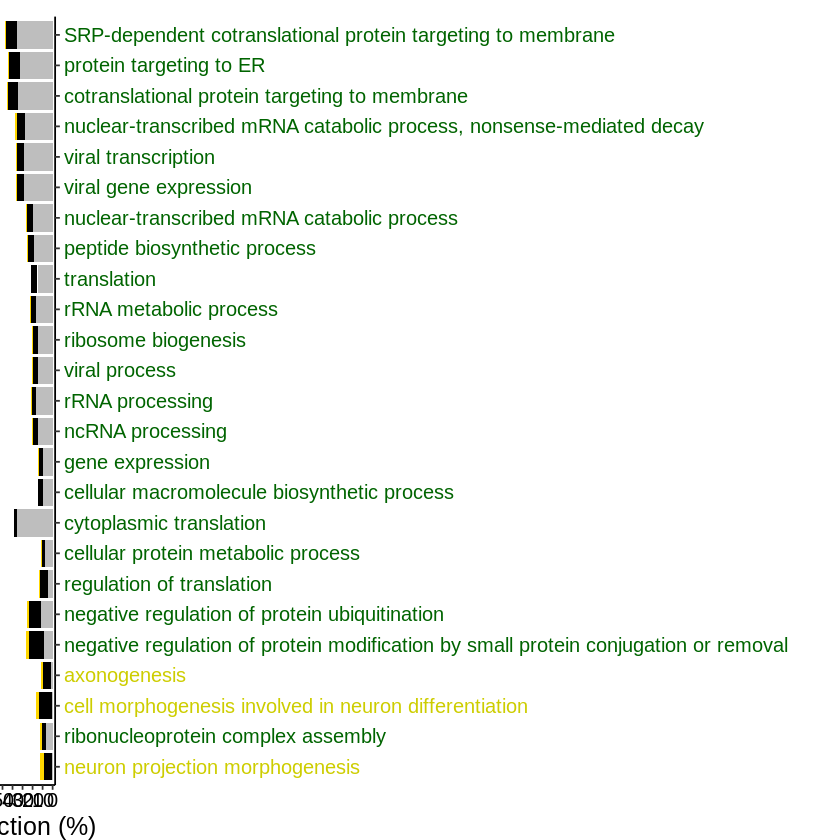

In [143]:
BP<- ggplot(neuron_CC_all, aes(x=Term, y=fraction_p,group=type,fill=type))+geom_bar(stat="identity")+scale_fill_manual(values=c("Esr1"="gold","TF_gene"="black","other_gene"="grey"))+
coord_flip()+ scale_y_reverse(limits=c(50, 0))+scale_x_discrete(position = "top") 
BP+theme(axis.title.y=element_blank(),
        ,axis.text.y=element_text(size=12,colour=rev(color)),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),legend.position = "none",
panel.background = element_blank(),axis.text.x=element_text(size=12,angle = 0, hjust = 0.5,color="black"),axis.title.x=element_text(size=15), axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.1, "cm"),  axis.ticks.y = element_line(size=0.5) , plot.margin = margin(10, 28, 0, 0))+ylab("Fraction (%)")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/ontologyBP_detailed.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Female_ontologyBP_detailed_rev#1_com#10.pdf",height=4, width=10 , paper = "letter")